# DAT210x - Programming with Python for DS

## Module4- Lab4

In [23]:
import math, random
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib
import scipy.io

from mpl_toolkits.mplot3d import Axes3D

In [24]:
# Look pretty...

# matplotlib.style.use('ggplot')
# plt.style.use('ggplot')

### Some Boilerplate Code

For your convenience, we've included some boilerplate code here which will help you out. You aren't expected to know how to write this code on your own at this point, but it'll assist with your visualizations and loading of the `.mat` file. We've added some notes to the code in case you're interested in knowing what it's doing:

In [25]:
def Plot2D(T, title, x, y, num_to_plot=40):
    # This method picks a bunch of random samples (images in your case)
    # to plot onto the chart:
    fig = plt.figure()
    
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel('Component: {0}'.format(x))
    ax.set_ylabel('Component: {0}'.format(y))
    
    x_size = (max(T[:,x]) - min(T[:,x])) * 0.08
    y_size = (max(T[:,y]) - min(T[:,y])) * 0.08
    
    for i in range(num_to_plot):
        img_num = int(random.random() * num_images)
        x0, y0 = T[img_num,x]-x_size/2., T[img_num,y]-y_size/2.
        x1, y1 = T[img_num,x]+x_size/2., T[img_num,y]+y_size/2.
        img = df.iloc[img_num,:].reshape(num_pixels, num_pixels)
        ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

    # It also plots the full scatter:
    ax.scatter(T[:,x],T[:,y], marker='.',alpha=0.7)

A `.MAT` file is a MATLAB file type. The faces dataset could have came in through `.png` images, but we'll show you how to do that in another lab. For now, you'll see how to import `.mats`:

In [26]:
mat = scipy.io.loadmat('Datasets/face_data.mat')
df = pd.DataFrame(mat['images']).T
num_images, num_pixels = df.shape
num_pixels = int(math.sqrt(num_pixels))

# Rotate the pictures, so we don't have to crane our necks:
for i in range(num_images):
    df.loc[i,:] = df.loc[i,:].reshape(num_pixels, num_pixels).T.reshape(-1)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


### And Now, The Assignment

Implement PCA here. Reduce the dataframe `df` down to _three_ components. Once you've done that, call Plot2D.

The format is: `Plot2D(T, title, x, y, num_to_plot=40)`:

- `T` Your transformed data, stored in an NDArray.
- `title` Your chart's title
- `x` Index of the principal component you want displayed on the x-axis; set it to `0` or `1`
- `y` Index of the principal component you want displayed on the y-axis; set it to `1` or `2`

<IPython.core.display.Javascript object>


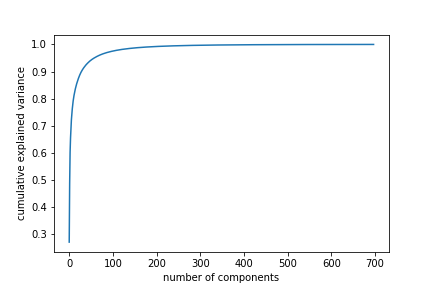

<IPython.core.display.Javascript object>


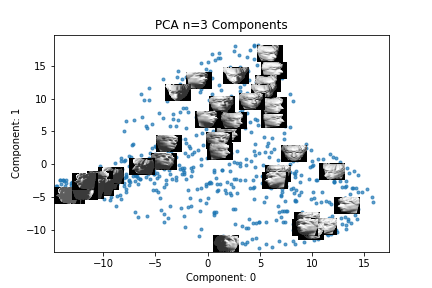

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:18: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [27]:
from sklearn.decomposition import PCA
import numpy as np
from scipy import stats
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
pca = PCA(n_components=3, svd_solver="full")
T = pca.fit_transform(df)
Plot2D(T, title="PCA n=3 Components", x=0,y=1, num_to_plot=40)
plt.show()

Implement Isomap here. Reduce the dataframe `df` down to _three_ components. Once you've done that, call Plot2D using the first two components:

<IPython.core.display.Javascript object>


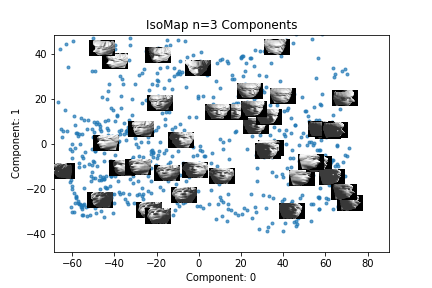

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:18: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [28]:
from sklearn import manifold
iso = manifold.Isomap(n_components=3)
iso.fit(df)
isoMap = iso.transform(df)
Plot2D(isoMap, title="IsoMap n=3 Components", x=0,y=1, num_to_plot=40)
plt.show()

If you're up for a challenge, draw your dataframes in 3D. Even if you're not up for a challenge, just do it anyway. You might have to increase the dimensionality of your transformed dataset:

In [29]:
def Plot3D(T, title, x, y, z, num_to_plot=40):
    # This method picks a bunch of random samples (images in your case)
    # to plot onto the chart:
    fig = plt.figure()
    
    ax = fig.add_subplot(111, projection ="3d")
    ax.set_title(title)
    ax.set_xlabel('Component: {0}'.format(x))
    ax.set_ylabel('Component: {0}'.format(y))
    ax.set_zlabel('Component: {0}'.format(z))
    
    x_size = (max(T[:,x]) - min(T[:,x])) * 0.08
    y_size = (max(T[:,y]) - min(T[:,y])) * 0.08
    z_size = (max(T[:,z]) - min(T[:,z])) * 0.08
    
    for i in range(num_to_plot):
        img_num = int(random.random() * num_images)
        x0, y0, z0 = T[img_num,x]-x_size/2., T[img_num,y]-y_size/2., T[img_num,z]-z_size/2.
        x1, y1, z1 = T[img_num,x]+x_size/2., T[img_num,y]+y_size/2., T[img_num,z]+z_size/2.
        x3, y3, z3 = T[img_num,x]+x_size/2., T[img_num,y]+y_size/2., T[img_num,z]+z_size/2.
        img = df.iloc[img_num,:].reshape(num_pixels, num_pixels)
        ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

    # It also plots the full scatter:
    ax.scatter(T[:,x],T[:,y],T[:,z], marker='.',alpha=0.7)
    

<IPython.core.display.Javascript object>


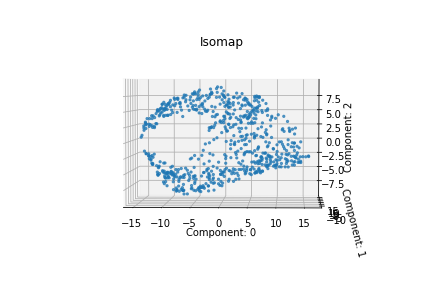

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:21: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


<IPython.core.display.Javascript object>


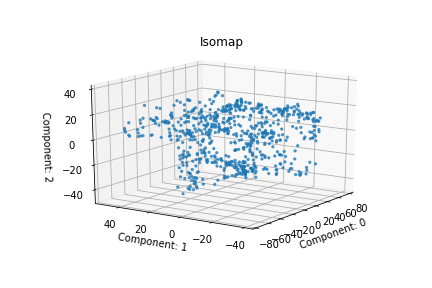

In [34]:
Plot3D(T,title="Isomap", x=0,y=1,z=2, num_to_plot=60)
plt.show()
Plot3D(isoMap,title="Isomap", x=0,y=1,z=2, num_to_plot=60)
plt.show()

<IPython.core.display.Javascript object>


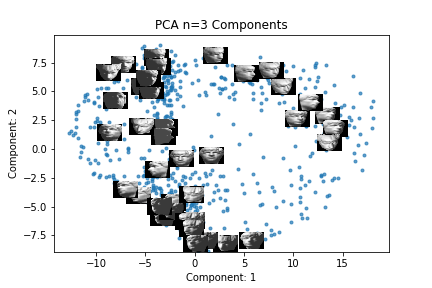

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:18: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [36]:
from sklearn.decomposition import PCA
import numpy as np
from scipy import stats
pca = PCA(n_components=3, svd_solver="full")
T = pca.fit_transform(df)
Plot2D(T, title="PCA n=3 Components", x=1,y=2, num_to_plot=40)
plt.show()

<IPython.core.display.Javascript object>


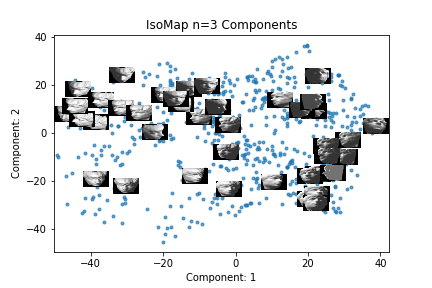

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:18: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [37]:
from sklearn import manifold
iso = manifold.Isomap(n_components=3)
iso.fit(df)
isoMap = iso.transform(df)
Plot2D(isoMap, title="IsoMap n=3 Components", x=1,y=2, num_to_plot=40)
plt.show()

<IPython.core.display.Javascript object>


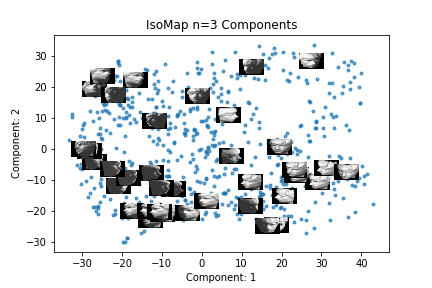

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:18: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [38]:
from sklearn import manifold
iso = manifold.Isomap(n_neighbors=8, n_components=3)
iso.fit(df)
isoMap = iso.transform(df)
Plot2D(isoMap, title="IsoMap n=3 Components", x=1,y=2, num_to_plot=40)
plt.show()